<a href="https://colab.research.google.com/github/20hnu/ml_projects/blob/main/Flight_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [422]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [423]:
df = pd.read_csv("/content/drive/MyDrive/Flight Price Prediction/flight_price.csv")

In [424]:
df_copy = pd.read_csv("/content/drive/MyDrive/Flight Price Prediction/flight_price.csv")

In [425]:
df.head(5)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [426]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [427]:
!pip install pandas-profiling

In [428]:
!pip install ydata-profiling


In [429]:
from ydata_profiling import ProfileReport

profile = ProfileReport(df, title='Pandas Profiling Report', explorative=True)

# Save the report as an HTML file
profile.to_file("report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [430]:
profile.to_notebook_iframe()

In [431]:
df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [432]:
df["Date_of_Journey"][6]

'12/03/2019'

In [433]:
df.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [434]:
df[df.duplicated(keep=False)].sort_values(["Airline",	"Date_of_Journey",	"Source","Destination"])

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
6321,Air India,01/03/2019,Banglore,New Delhi,BLR → BOM → AMD → DEL,08:50,23:55 02 Mar,39h 5m,2 stops,No info,17135
9848,Air India,01/03/2019,Banglore,New Delhi,BLR → BOM → AMD → DEL,08:50,23:55 02 Mar,39h 5m,2 stops,No info,17135
572,Air India,03/03/2019,Banglore,New Delhi,BLR → DEL,21:10,23:55,2h 45m,non-stop,No info,7591
8168,Air India,03/03/2019,Banglore,New Delhi,BLR → DEL,21:10,23:55,2h 45m,non-stop,No info,7591
1495,Air India,1/04/2019,Kolkata,Banglore,CCU → DEL → COK → BLR,10:00,01:20 02 Apr,15h 20m,2 stops,No info,10408
...,...,...,...,...,...,...,...,...,...,...,...
2692,SpiceJet,24/03/2019,Banglore,New Delhi,BLR → DEL,05:45,08:35,2h 50m,non-stop,No check-in baggage included,4273
2870,SpiceJet,24/03/2019,Banglore,New Delhi,BLR → DEL,05:45,08:35,2h 50m,non-stop,No check-in baggage included,4273
3711,SpiceJet,24/03/2019,Banglore,New Delhi,BLR → DEL,20:30,23:20,2h 50m,non-stop,No check-in baggage included,3873
2634,Vistara,24/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,5403


In [435]:
df.columns = df.columns.str.lower()

In [436]:
df.columns

Index(['airline', 'date_of_journey', 'source', 'destination', 'route',
       'dep_time', 'arrival_time', 'duration', 'total_stops',
       'additional_info', 'price'],
      dtype='object')

In [437]:
df.select_dtypes(include="O")

,airline,date_of_journey,source,destination,route,dep_time,arrival_time,duration,total_stops,additional_info
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info
...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info


In [438]:
df["airline"].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [439]:
df["airline"].value_counts()

airline
Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64

In [440]:
df["airline"] = df["airline"].str.replace(" Premium economy","")

In [441]:
df["airline"] = df["airline"].str.replace(" Business","")

In [442]:
df["airline"] = df["airline"].str.title()

This is the Functional approach to run different operations.

In [443]:
(
    df
    .airline
    .str.replace(" Premium economy","")
    .str.replace(" Business","")
    .str.title()
)

0             Indigo
1          Air India
2        Jet Airways
3             Indigo
4             Indigo
            ...     
10678       Air Asia
10679      Air India
10680    Jet Airways
10681        Vistara
10682      Air India
Name: airline, Length: 10683, dtype: object

In [444]:
df.airline.unique()

array(['Indigo', 'Air India', 'Jet Airways', 'Spicejet',
       'Multiple Carriers', 'Goair', 'Vistara', 'Air Asia', 'Trujet'],
      dtype=object)

In [445]:
import datetime
df.date_of_journey = pd.to_datetime(df.date_of_journey, dayfirst=True)

In [446]:
df.dtypes

airline                    object
date_of_journey    datetime64[ns]
source                     object
destination                object
route                      object
dep_time                   object
arrival_time               object
duration                   object
total_stops                object
additional_info            object
price                       int64
dtype: object

In [447]:
df.source.unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [448]:
df.destination.unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [449]:
df.drop(columns = "route",inplace=True)

In [450]:
df.columns

Index(['airline', 'date_of_journey', 'source', 'destination', 'dep_time',
       'arrival_time', 'duration', 'total_stops', 'additional_info', 'price'],
      dtype='object')

In [451]:
df.dep_time.str.contains(':',regex=False).unique()

array([ True])

In [452]:
df.dep_time = pd.to_datetime(df.dep_time).dt.time

In [453]:
df.dep_time

0        22:20:00
1        05:50:00
2        09:25:00
3        18:05:00
4        16:50:00
           ...   
10678    19:55:00
10679    20:45:00
10680    08:20:00
10681    11:30:00
10682    10:55:00
Name: dep_time, Length: 10683, dtype: object

In [454]:
df[df.arrival_time.str.contains("[^0-9:]")].arrival_time


0        01:10 22 Mar
2        04:25 10 Jun
6        10:25 13 Mar
7        05:05 02 Mar
8        10:25 13 Mar
             ...     
10666    19:00 13 Jun
10667    20:20 13 Mar
10672    19:00 28 Jun
10673    04:25 28 May
10674    21:20 13 Mar
Name: arrival_time, Length: 4335, dtype: object

In [455]:
df.arrival_time = df.arrival_time.str.split(" ").str[0]

In [456]:
df["arrival_time"] = pd.to_datetime(df.arrival_time, dayfirst=True).dt.time

In [457]:
df.arrival_time

0        01:10:00
1        13:15:00
2        04:25:00
3        23:30:00
4        21:35:00
           ...   
10678    22:25:00
10679    23:20:00
10680    11:20:00
10681    14:10:00
10682    19:15:00
Name: arrival_time, Length: 10683, dtype: object

In [458]:
df.duration

0        2h 50m
1        7h 25m
2           19h
3        5h 25m
4        4h 45m
          ...  
10678    2h 30m
10679    2h 35m
10680        3h
10681    2h 40m
10682    8h 20m
Name: duration, Length: 10683, dtype: object

In [459]:
df_hour = df.duration.str.split().str[0]
df_minute =  df.duration.str.split().str[1]

In [460]:
df_minute = df_minute.fillna(0)

In [461]:
df_hour[df_hour.str.contains('m')] = '0'

In [462]:
df_hour[6474]

'0'

In [463]:
df_minute[6474] = df_hour[6474]

In [464]:
df_minute[6474]

'0'

In [465]:
df_hour= df_hour.str.removesuffix("h").astype(int)
df_minute = df_minute.str.removesuffix("m").fillna(0).astype(int)

In [466]:
df_time  = df_hour*60 + df_minute

In [467]:
df_time

0         170
1         445
2        1140
3         325
4         285
         ... 
10678     150
10679     155
10680     180
10681     160
10682     500
Name: duration, Length: 10683, dtype: int64

In [468]:
df.duration = df_time

In [469]:
df.duration

0         170
1         445
2        1140
3         325
4         285
         ... 
10678     150
10679     155
10680     180
10681     160
10682     500
Name: duration, Length: 10683, dtype: int64

In [470]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   airline          10683 non-null  object        
 1   date_of_journey  10683 non-null  datetime64[ns]
 2   source           10683 non-null  object        
 3   destination      10683 non-null  object        
 4   dep_time         10683 non-null  object        
 5   arrival_time     10683 non-null  object        
 6   duration         10683 non-null  int64         
 7   total_stops      10682 non-null  object        
 8   additional_info  10683 non-null  object        
 9   price            10683 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(7)
memory usage: 834.7+ KB


In [471]:
df.total_stops

0        non-stop
1         2 stops
2         2 stops
3          1 stop
4          1 stop
           ...   
10678    non-stop
10679    non-stop
10680    non-stop
10681    non-stop
10682     2 stops
Name: total_stops, Length: 10683, dtype: object

In [472]:
df.total_stops = df.total_stops.str.replace("non-stop","0")

In [473]:
df.total_stops = df.total_stops.str.replace("2 stops","2")
df.total_stops = df.total_stops.str.replace("3 stops","3")
df.total_stops = df.total_stops.str.replace("4 stops","4")
df.total_stops = df.total_stops.str.replace("1 stop","1")



In [474]:
df.total_stops

0        0
1        2
2        2
3        1
4        1
        ..
10678    0
10679    0
10680    0
10681    0
10682    2
Name: total_stops, Length: 10683, dtype: object

In [475]:
df.total_stops = df.total_stops.astype(float)

In [476]:
df.total_stops

0        0.0
1        2.0
2        2.0
3        1.0
4        1.0
        ... 
10678    0.0
10679    0.0
10680    0.0
10681    0.0
10682    2.0
Name: total_stops, Length: 10683, dtype: float64

In [477]:
df.additional_info.unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [478]:
df.additional_info = df.additional_info.str.replace("No info","No Info")

In [479]:
df.additional_info.unique()
df = df.drop_duplicates()

In [480]:
df

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price
0,Indigo,2019-03-24,Banglore,New Delhi,22:20:00,01:10:00,170,0.0,No Info,3897
1,Air India,2019-05-01,Kolkata,Banglore,05:50:00,13:15:00,445,2.0,No Info,7662
2,Jet Airways,2019-06-09,Delhi,Cochin,09:25:00,04:25:00,1140,2.0,No Info,13882
3,Indigo,2019-05-12,Kolkata,Banglore,18:05:00,23:30:00,325,1.0,No Info,6218
4,Indigo,2019-03-01,Banglore,New Delhi,16:50:00,21:35:00,285,1.0,No Info,13302
...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,2019-04-09,Kolkata,Banglore,19:55:00,22:25:00,150,0.0,No Info,4107
10679,Air India,2019-04-27,Kolkata,Banglore,20:45:00,23:20:00,155,0.0,No Info,4145
10680,Jet Airways,2019-04-27,Banglore,Delhi,08:20:00,11:20:00,180,0.0,No Info,7229
10681,Vistara,2019-03-01,Banglore,New Delhi,11:30:00,14:10:00,160,0.0,No Info,12648


In [481]:
flights_cleaned = df

## Split the Data

In [482]:
flights_final = flights_cleaned.sample(1000)

In [483]:
flights_final

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price
8046,Jet Airways,2019-05-21,Kolkata,Banglore,06:30:00,12:00:00,330,1.0,No Info,14388
8339,Jet Airways,2019-03-12,Banglore,New Delhi,18:55:00,13:15:00,1100,1.0,In-flight meal not included,11087
1130,Vistara,2019-06-12,Delhi,Cochin,14:40:00,17:50:00,190,0.0,No Info,6216
1458,Jet Airways,2019-05-09,Delhi,Cochin,22:50:00,19:00:00,1210,1.0,In-flight meal not included,12373
9747,Air India,2019-05-09,Kolkata,Banglore,12:00:00,13:15:00,1515,1.0,No Info,6612
...,...,...,...,...,...,...,...,...,...,...
7162,Indigo,2019-06-24,Kolkata,Banglore,04:40:00,07:15:00,155,0.0,No Info,4804
615,Jet Airways,2019-05-09,Delhi,Cochin,21:50:00,19:00:00,1270,1.0,No Info,15554
8095,Jet Airways,2019-05-21,Kolkata,Banglore,06:30:00,07:25:00,1495,2.0,In-flight meal not included,10118
4629,Spicejet,2019-05-03,Kolkata,Banglore,06:55:00,09:30:00,155,0.0,No Info,3873


In [484]:
x = flights_final.drop(columns="price")
y = flights_final.price.copy()

In [485]:
from sklearn.model_selection import train_test_split

In [486]:
X_, X_test, y_, y_test = train_test_split(x, y, test_size = 0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_, y_, test_size = 0.2, random_state=42)


In [487]:
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)

(640, 9) (640,)
(160, 9) (160,)
(200, 9) (200,)


In [488]:
import matplotlib.pyplot as plt
import seaborn as sns
import eda_helper_functions

In [489]:
pd.concat([X_train, y_train],axis=1).to_csv('output.csv', index=False)

In [598]:
pd.concat([X_val, y_val],axis=1).to_csv('output_val.csv', index=False)
pd.concat([X_test, y_test],axis=1).to_csv('output_test.csv', index=False)

In [490]:
train = pd.read_csv("output.csv")

In [491]:
train.dtypes

airline             object
date_of_journey     object
source              object
destination         object
dep_time            object
arrival_time        object
duration             int64
total_stops        float64
additional_info     object
price                int64
dtype: object

In [492]:
required_columns = ["date_of_journey","dep_time","arrival_time"]
for items in required_columns:
  train[items] = pd.to_datetime(train[items],dayfirst=True,format="mixed")

In [493]:
train.dtypes

airline                    object
date_of_journey    datetime64[ns]
source                     object
destination                object
dep_time           datetime64[ns]
arrival_time       datetime64[ns]
duration                    int64
total_stops               float64
additional_info            object
price                       int64
dtype: object

In [494]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   airline          640 non-null    object        
 1   date_of_journey  640 non-null    datetime64[ns]
 2   source           640 non-null    object        
 3   destination      640 non-null    object        
 4   dep_time         640 non-null    datetime64[ns]
 5   arrival_time     640 non-null    datetime64[ns]
 6   duration         640 non-null    int64         
 7   total_stops      640 non-null    float64       
 8   additional_info  640 non-null    object        
 9   price            640 non-null    int64         
dtypes: datetime64[ns](3), float64(1), int64(2), object(4)
memory usage: 50.1+ KB


In [495]:
train.describe(include="number")

,duration,total_stops,price
count,640.000000,640.000000,640.000000
mean,639.460938,0.814063,9096.240625
std,514.410018,0.641391,4303.903706
min,75.000000,0.000000,1965.000000
25%,175.000000,0.000000,5376.750000
50%,510.000000,1.000000,8557.500000
75%,910.000000,1.000000,12252.500000
max,2860.000000,3.000000,31825.000000


In [496]:
train["total_stops"]=train["total_stops"].astype(object)
train.describe(include="object")

,airline,source,destination,total_stops,additional_info
count,640,640,640,640.0,640
unique,8,5,6,4.0,4
top,Jet Airways,Delhi,Cochin,1.0,No Info
freq,221,272,272,358.0,513


In [497]:
train.isna().sum()

airline            0
date_of_journey    0
source             0
destination        0
dep_time           0
arrival_time       0
duration           0
total_stops        0
additional_info    0
price              0
dtype: int64

In [498]:
eda_helper_functions.missing_info(train)

,count,percentage
variable,,


<Axes: >

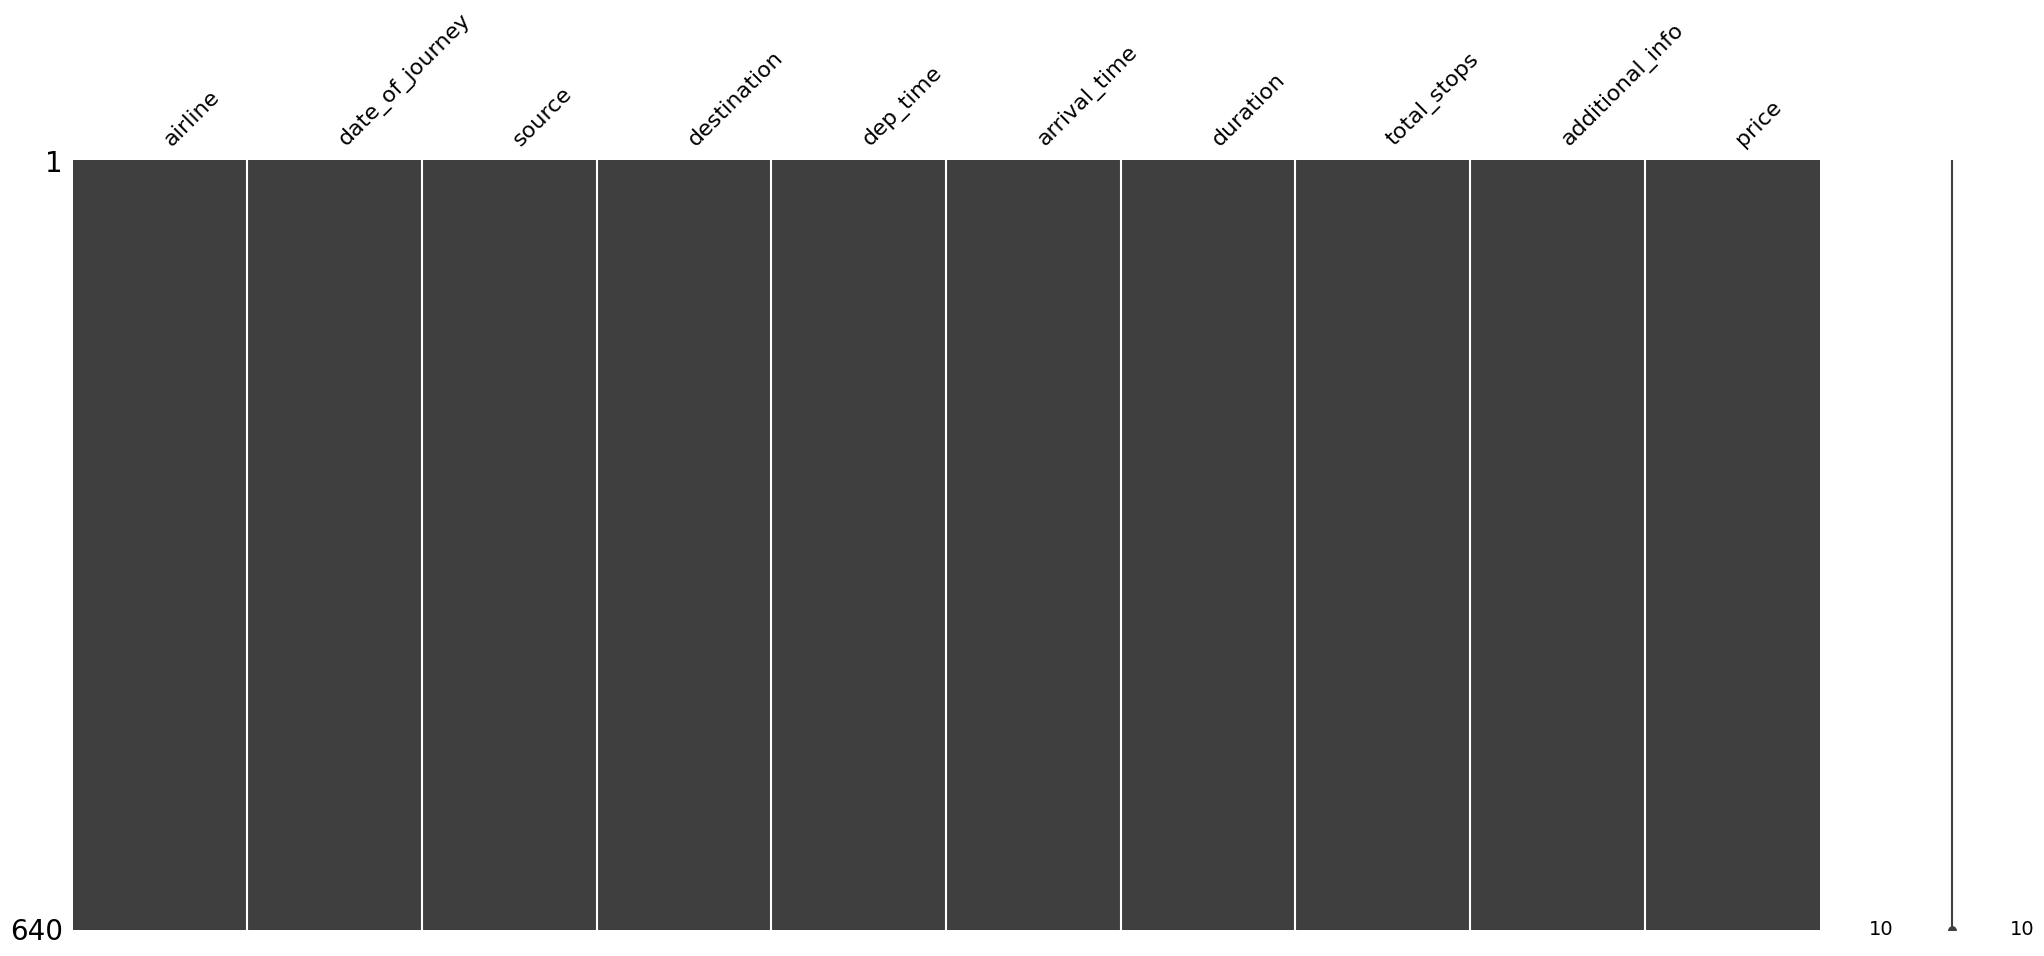

In [499]:
import missingno as msno
%matplotlib inline
msno.matrix(train)

<Axes: >

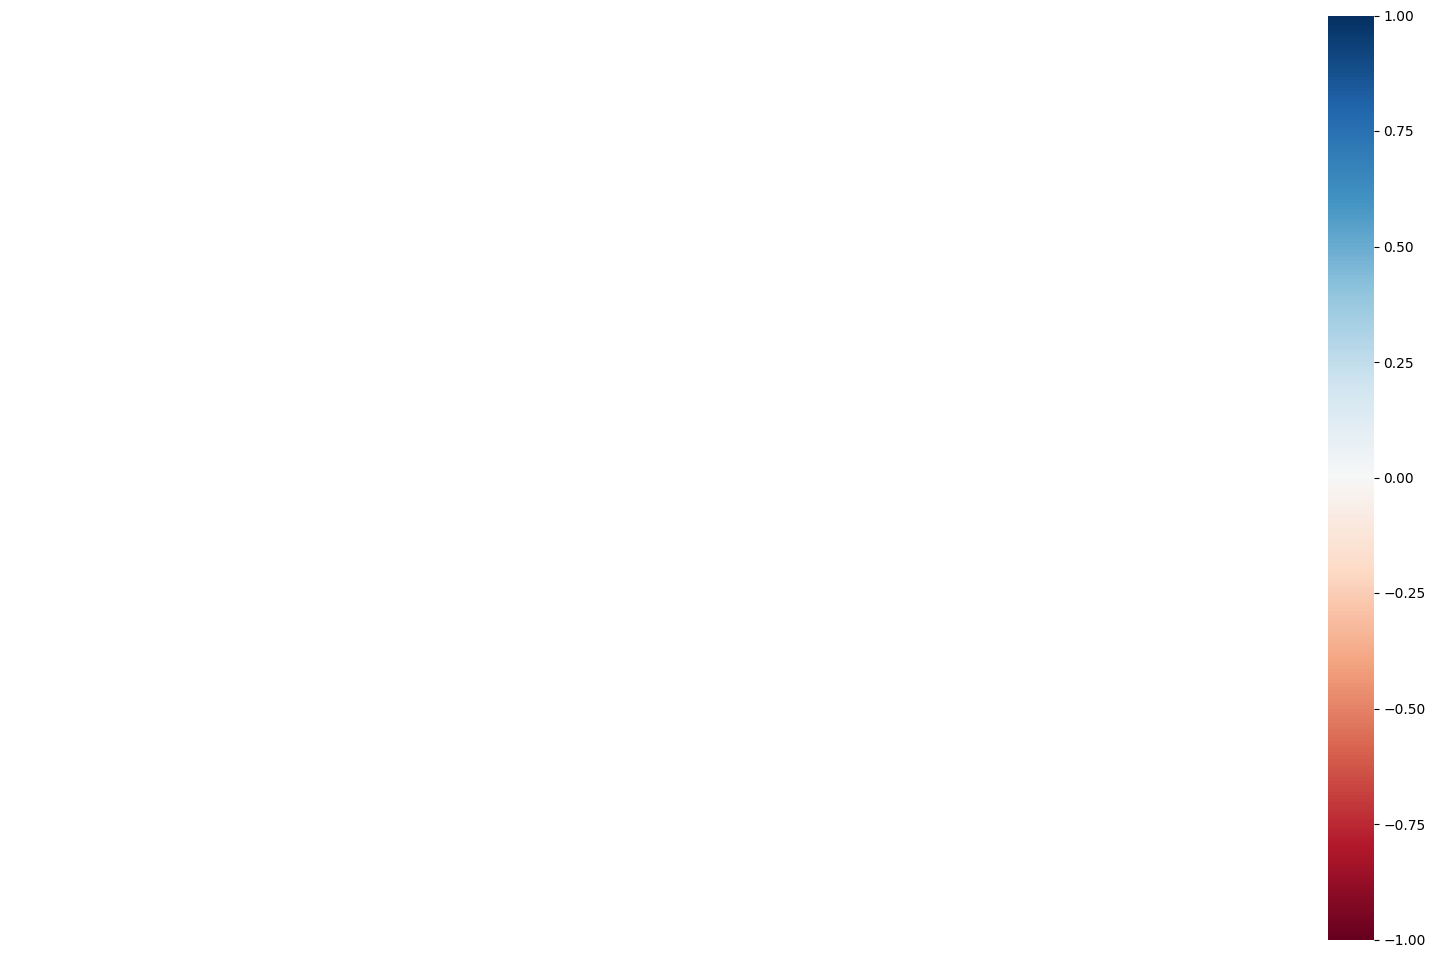

In [500]:
msno.heatmap(train)

<Axes: >

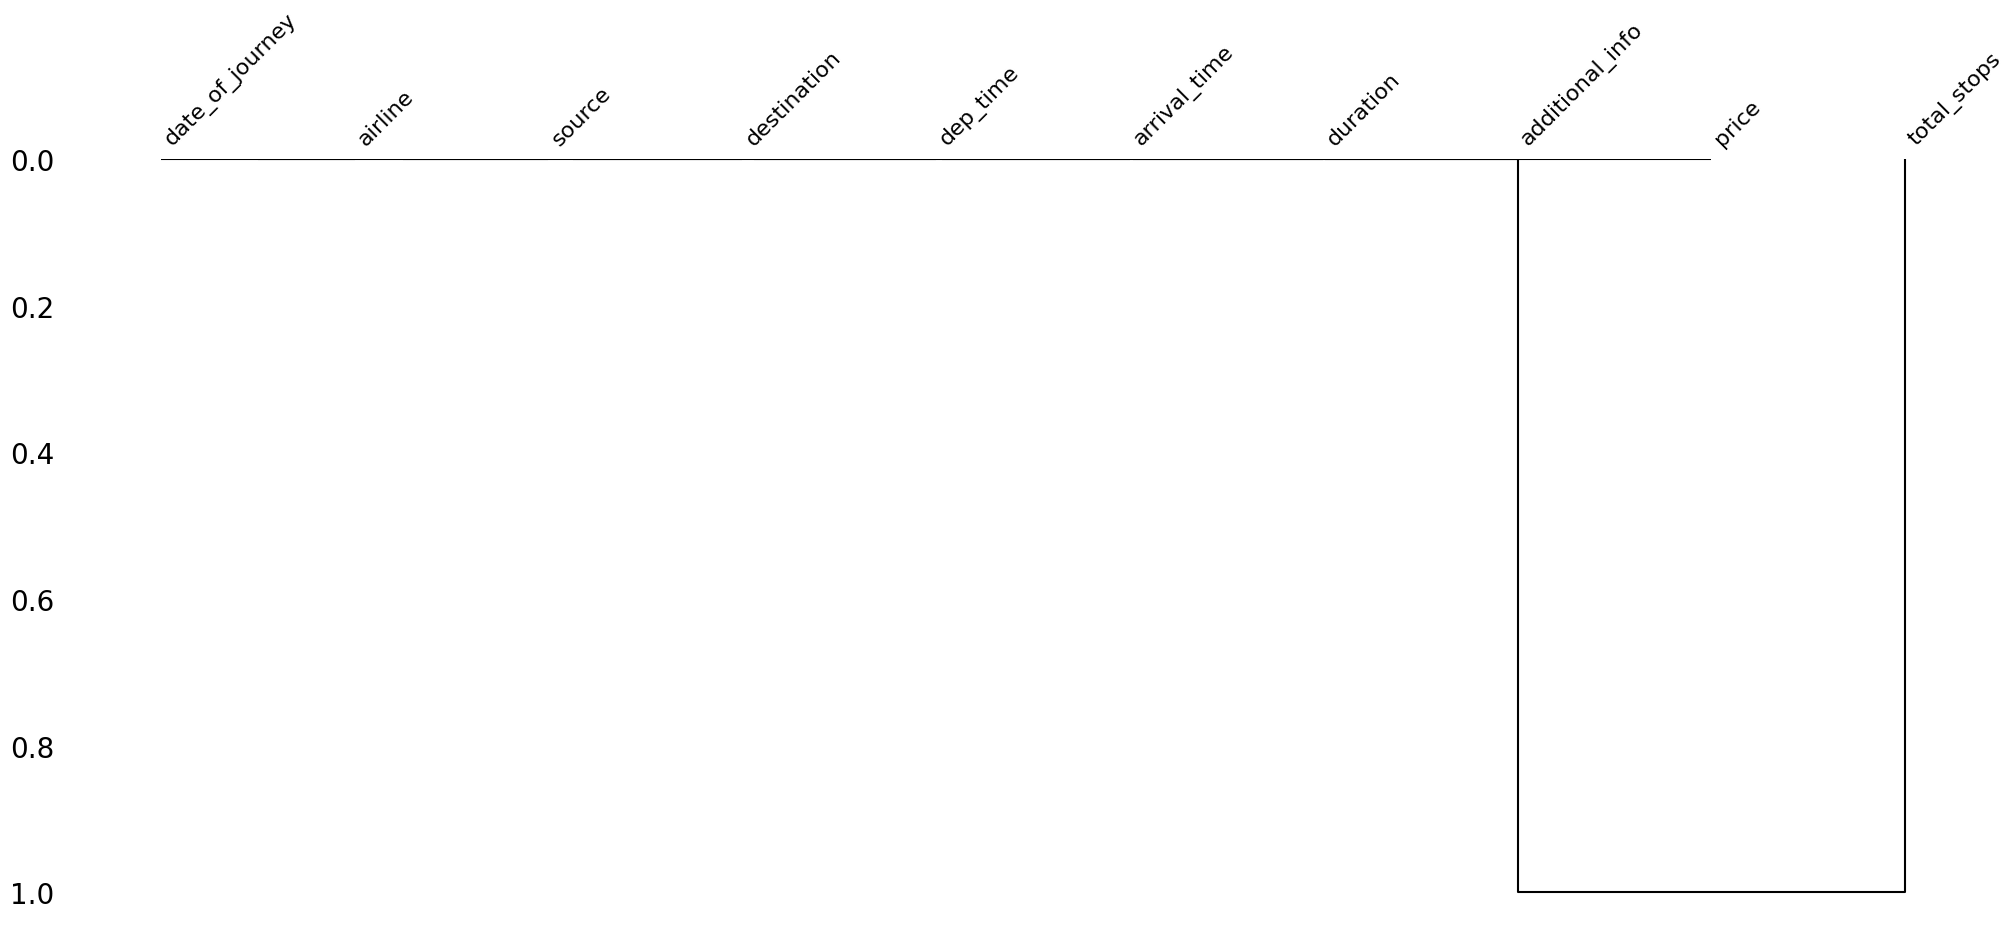

In [501]:
msno.dendrogram(df)

## Outliers
Isolation Forest Algorithm

<Axes: ylabel='date_of_journey'>

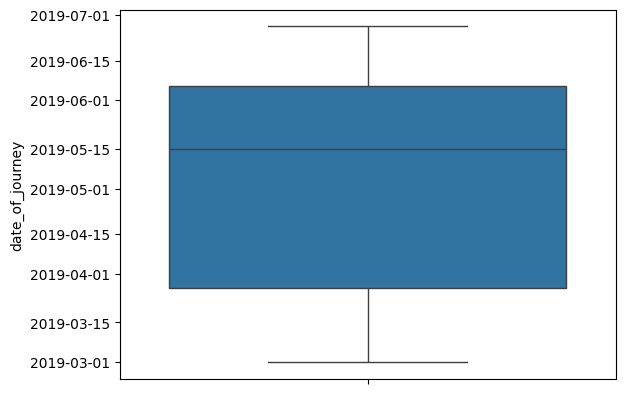

In [502]:
sns.boxplot(train["date_of_journey"])

In [503]:
from sklearn.ensemble import IsolationForest

In [504]:
forest = IsolationForest(n_estimators=10, random_state=42)
outlier = forest.fit_predict(train.select_dtypes(include="number"))

In [505]:
train["outlier"] = outlier

In [506]:
train.query("outlier == -1")

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price,outlier
1,Air India,2019-04-09,Delhi,Cochin,2024-05-12 12:55:00,2024-05-12 19:15:00,1820,2.0,No Info,9968,-1
2,Jet Airways,2019-03-06,Delhi,Cochin,2024-05-12 05:30:00,2024-05-12 19:45:00,2295,2.0,In-flight meal not included,15864,-1
11,Jet Airways,2019-05-21,Delhi,Cochin,2024-05-12 13:00:00,2024-05-12 19:00:00,360,1.0,No Info,16079,-1
12,Jet Airways,2019-03-21,Delhi,Cochin,2024-05-12 09:40:00,2024-05-12 04:25:00,2565,2.0,No Info,12819,-1
16,Indigo,2019-03-03,Delhi,Cochin,2024-05-12 07:20:00,2024-05-12 12:30:00,310,1.0,No Info,12214,-1
...,...,...,...,...,...,...,...,...,...,...,...
609,Vistara,2019-06-12,Kolkata,Banglore,2024-05-12 07:10:00,2024-05-12 10:45:00,1655,1.0,No Info,8452,-1
616,Multiple Carriers,2019-03-03,Delhi,Cochin,2024-05-12 17:50:00,2024-05-12 01:35:00,465,2.0,No Info,24528,-1
621,Jet Airways,2019-05-03,Mumbai,Hyderabad,2024-05-12 02:55:00,2024-05-12 04:20:00,85,0.0,No Info,5678,-1
622,Indigo,2019-03-15,Mumbai,Hyderabad,2024-05-12 02:30:00,2024-05-12 04:00:00,90,0.0,No Info,3342,-1


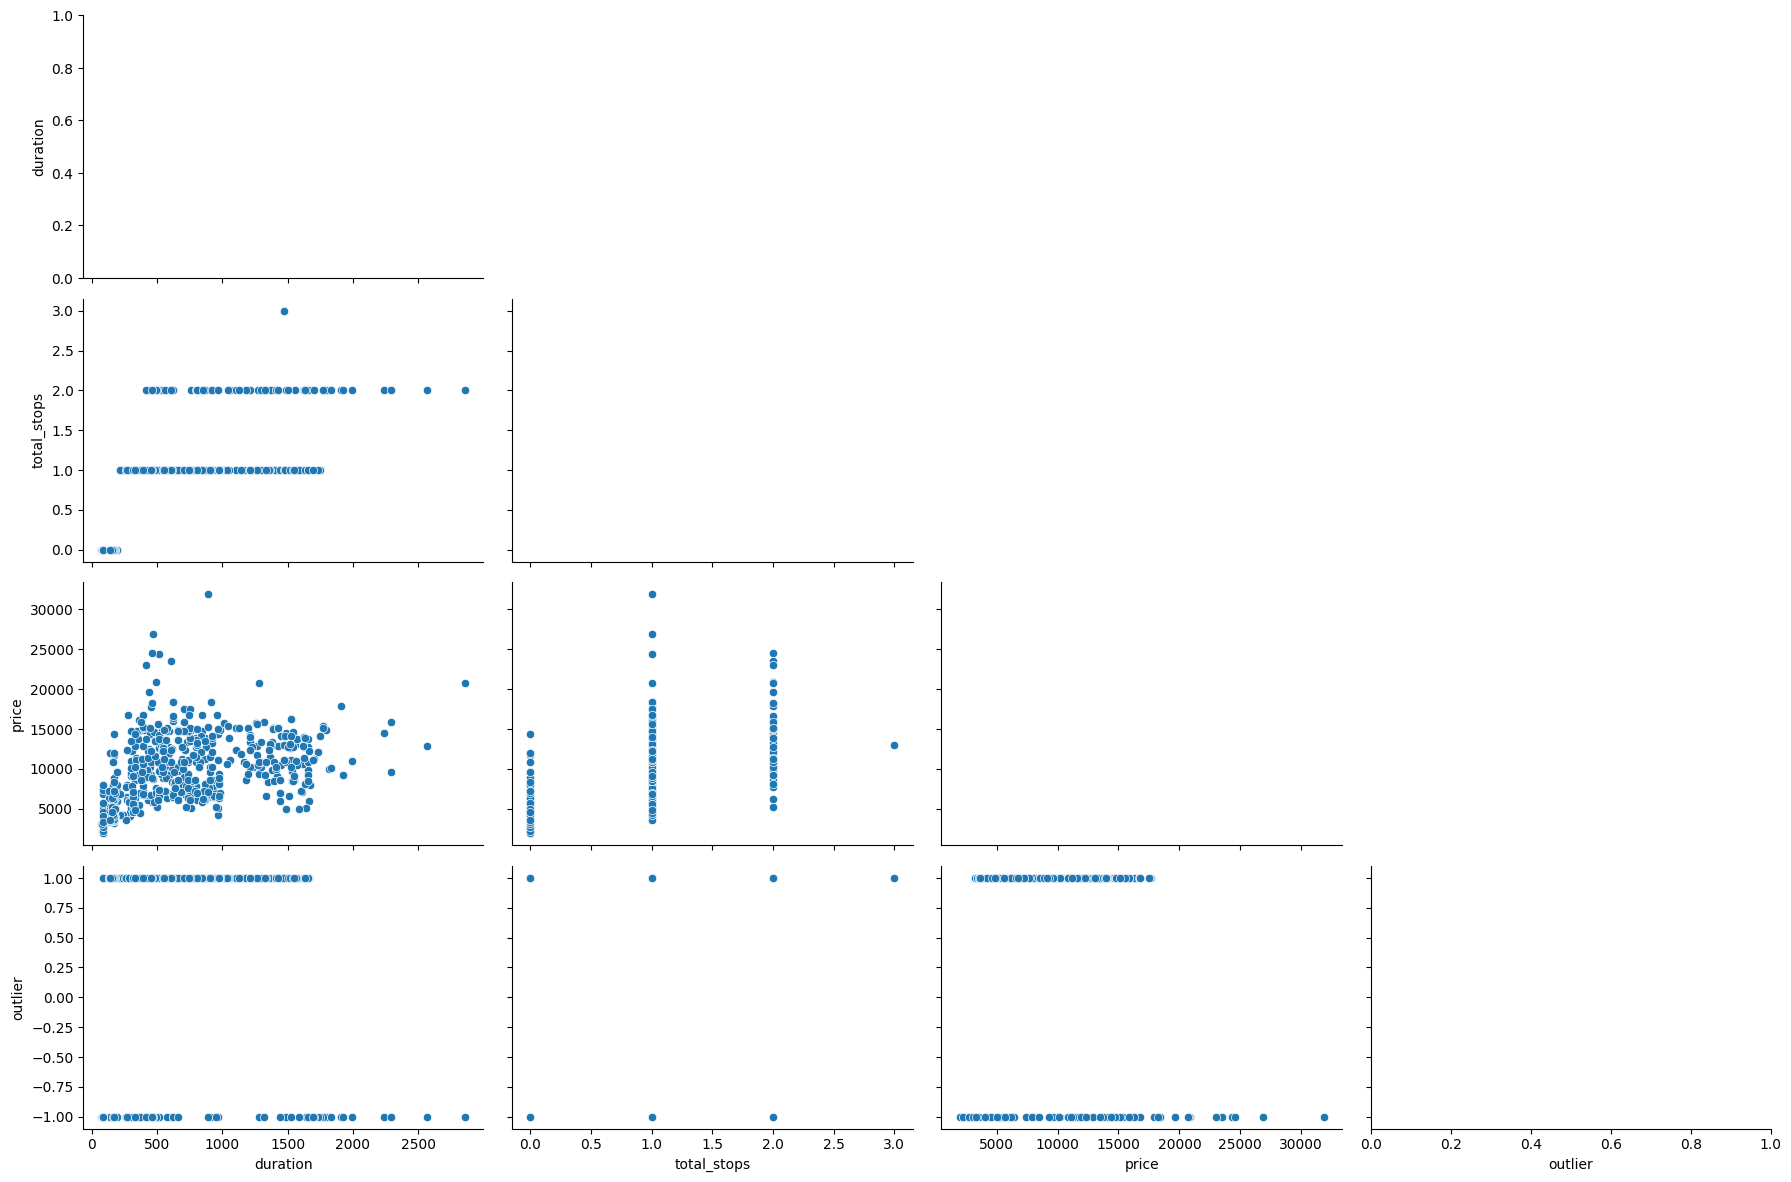

In [507]:
eda_helper_functions.pair_plots(train)

## Correlation Analysis

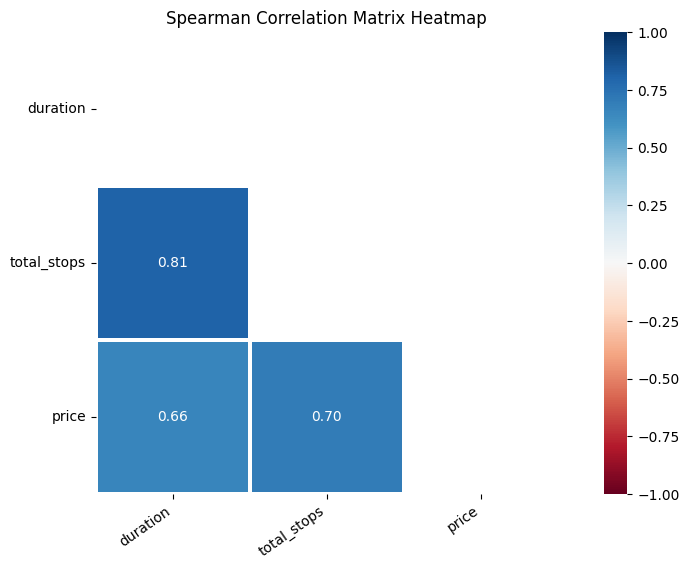

In [508]:
train["total_stops"] = train["total_stops"].astype(int)
train.drop(columns="outlier", axis=1, inplace=True)
eda_helper_functions.correlation_heatmap(train)

In [509]:
train.corr(method="spearman", numeric_only=True)

,duration,total_stops,price
duration,1.00000,0.807890,0.660520
total_stops,0.80789,1.000000,0.698911
price,0.66052,0.698911,1.000000


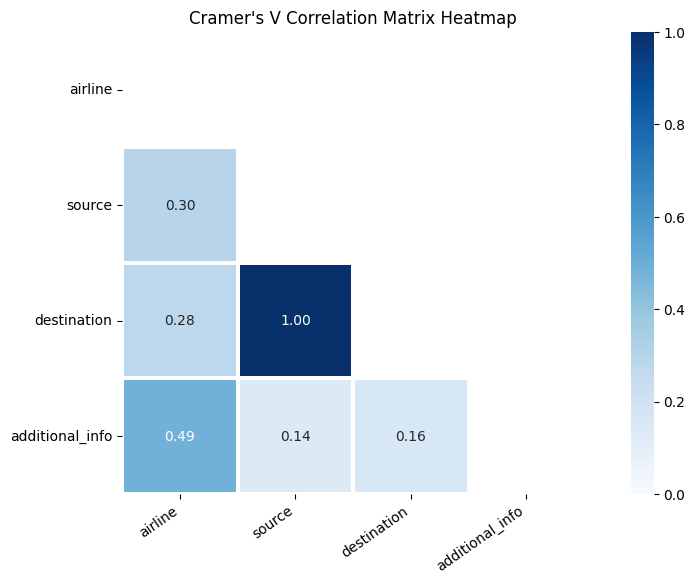

In [510]:
eda_helper_functions.cramersV_heatmap(train)

In [511]:
pd.crosstab(train["airline"],train["destination"]).sum()

destination
Banglore     193
Cochin       272
Delhi         68
Hyderabad     35
Kolkata       24
New Delhi     48
dtype: int64

In [512]:
train.columns

Index(['airline', 'date_of_journey', 'source', 'destination', 'dep_time',
       'arrival_time', 'duration', 'total_stops', 'additional_info', 'price'],
      dtype='object')

Detailed Analysis

airline


In [513]:
train["airline"]

0            Jet Airways
1              Air India
2            Jet Airways
3            Jet Airways
4              Air India
             ...        
635               Indigo
636              Vistara
637    Multiple Carriers
638          Jet Airways
639          Jet Airways
Name: airline, Length: 640, dtype: object

In [514]:
eda_helper_functions.cat_summary(train,"airline")

0            Jet Airways
1              Air India
2            Jet Airways
3            Jet Airways
4              Air India
             ...        
635               Indigo
636              Vistara
637    Multiple Carriers
638          Jet Airways
639          Jet Airways
Name: airline, Length: 640, dtype: object

Data Type      : object
Cardinality    : 8 categories
Missing Data   : 0 rows (0.00 %)
Available Data : 640 / 640 rows


,
count,640
unique,8
top,Jet Airways
freq,221


,count,percentage
category,,
Jet Airways,221,0.345313
Indigo,131,0.204687
Air India,95,0.148438
Multiple Carriers,77,0.120313
Spicejet,55,0.085938
Vistara,32,0.050000
Air Asia,18,0.028125
Goair,11,0.017188


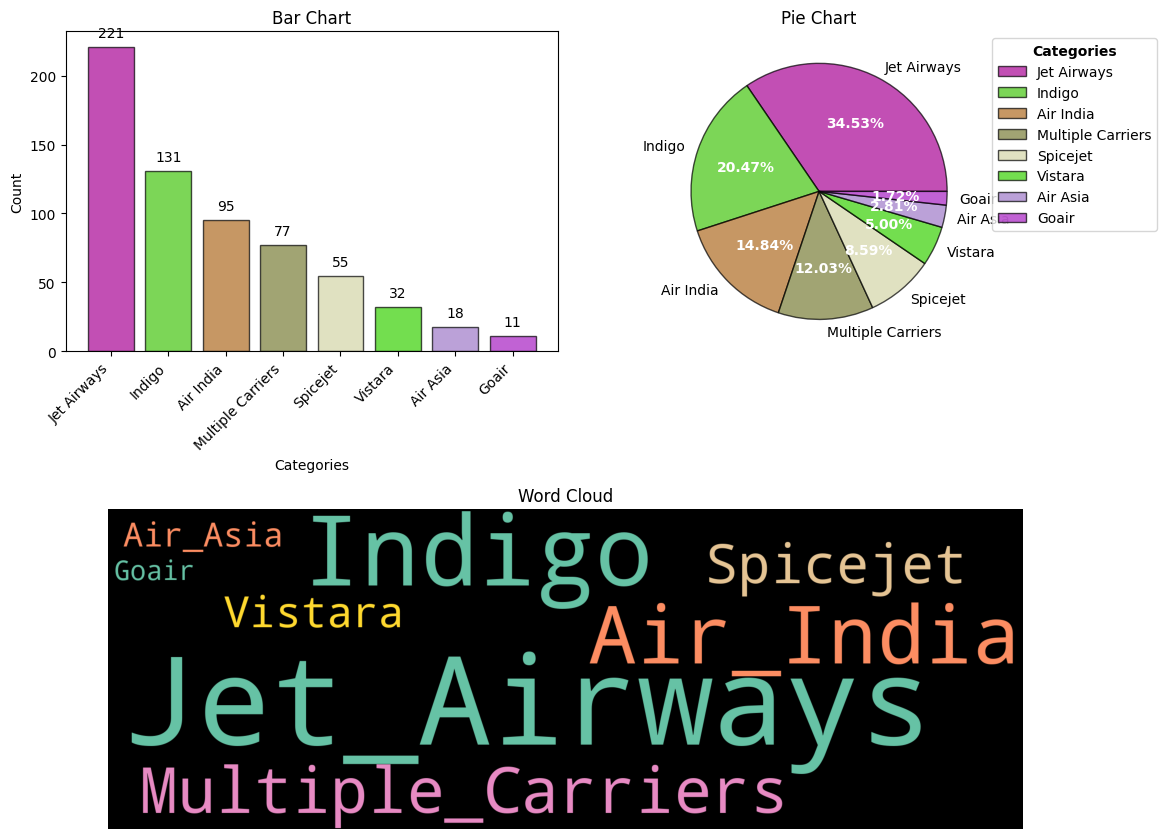

In [515]:
eda_helper_functions.cat_univar_plots(train,"airline")

In [516]:
import eda_helper_functions as ehf

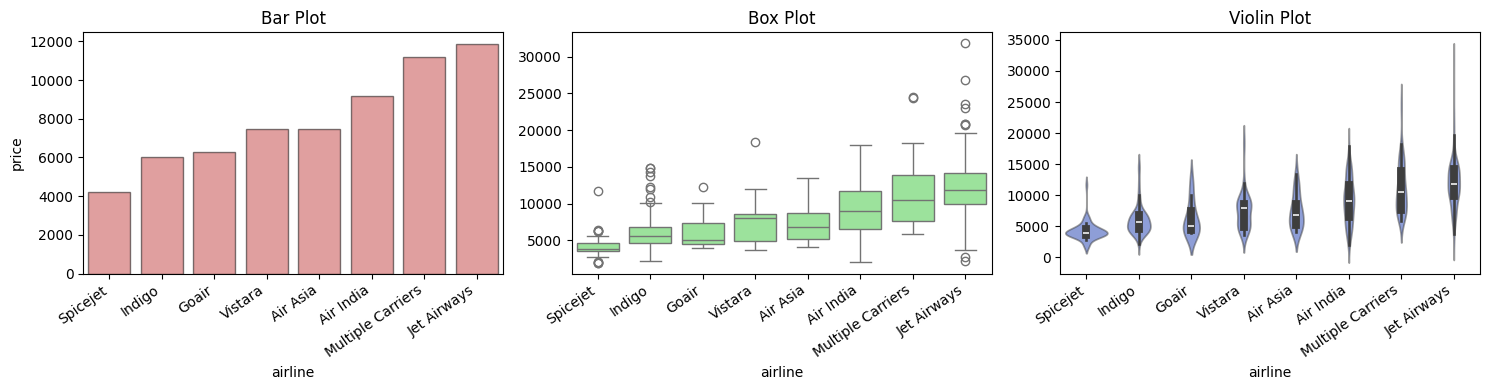

In [517]:
ehf.num_cat_bivar_plots(data = train,
                        num_var="price",
                        cat_var = "airline")

In [518]:
ehf.num_cat_hyp_testing(train, "price", "airline")

- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population mean
- Alternate Hypothesis : The groups don't have similar population mean
- Test Statistic       : 62.26852296518468
- p-value              : 6.015377439039798e-68
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and airline are associated to each other


- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population median
- Alternate Hypothesis : The groups don't have similar population median
- Test Statistic       : 305.90920888946084
- p-value              : 3.308256951114023e-62
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and airline are associated to each other


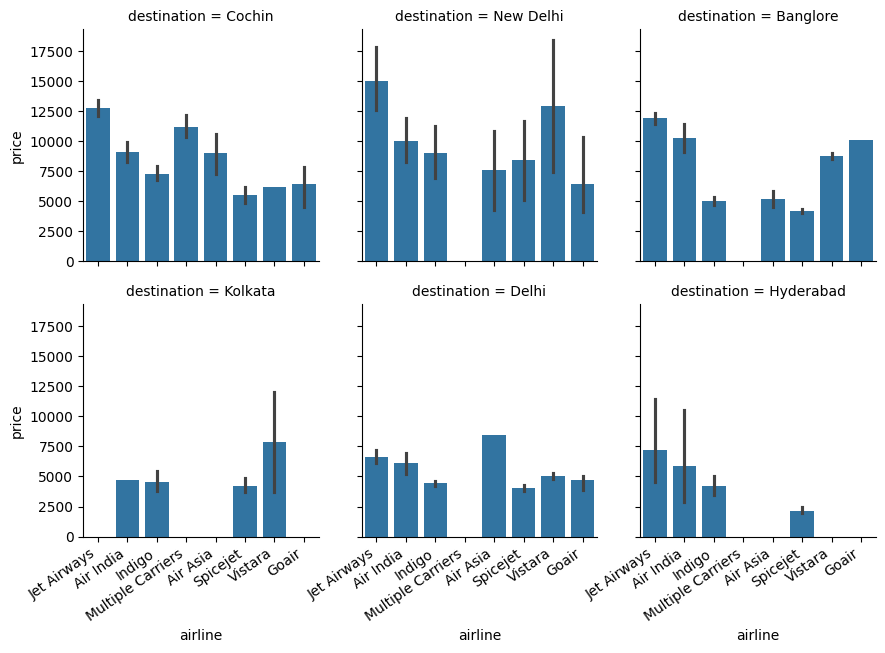

In [519]:
airline_grid = sns.FacetGrid(
    data = train,
    col="destination",
    col_wrap=3,
    sharey=True
)
airline_grid.map(sns.barplot, "airline","price")
for ax in airline_grid.axes[3:]:
  ehf.rotate_xlabels(ax)

date of journey

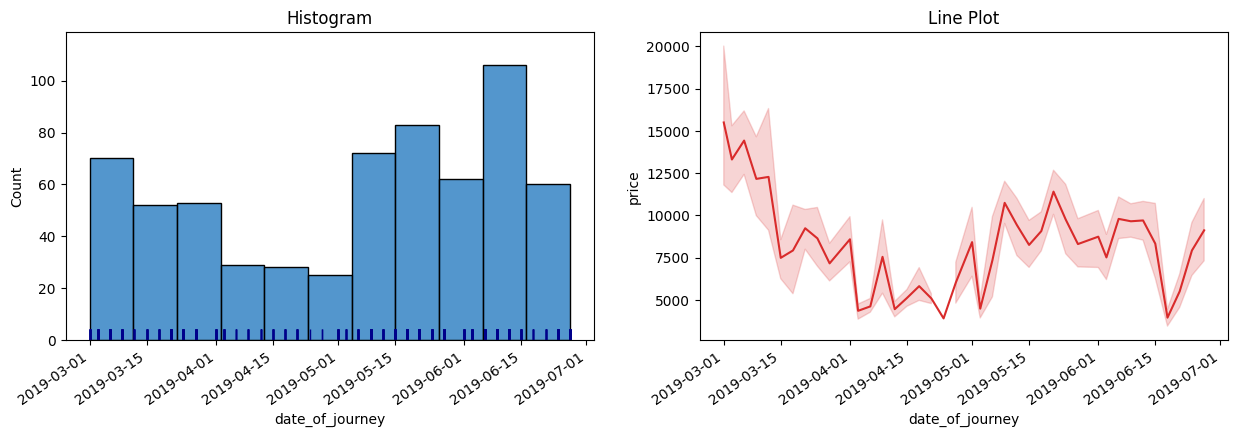

In [520]:
ehf.dt_univar_plots(
    data = train,
    var="date_of_journey",
    target="price"
)

In [521]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   airline          640 non-null    object        
 1   date_of_journey  640 non-null    datetime64[ns]
 2   source           640 non-null    object        
 3   destination      640 non-null    object        
 4   dep_time         640 non-null    datetime64[ns]
 5   arrival_time     640 non-null    datetime64[ns]
 6   duration         640 non-null    int64         
 7   total_stops      640 non-null    int64         
 8   additional_info  640 non-null    object        
 9   price            640 non-null    int64         
dtypes: datetime64[ns](3), int64(3), object(4)
memory usage: 50.1+ KB


In [522]:
train["airline"]

0            Jet Airways
1              Air India
2            Jet Airways
3            Jet Airways
4              Air India
             ...        
635               Indigo
636              Vistara
637    Multiple Carriers
638          Jet Airways
639          Jet Airways
Name: airline, Length: 640, dtype: object

In [523]:
grouped = train.groupby(pd.Grouper(key="date_of_journey", freq="M"))

In [524]:
grouped["price"].mean().to_frame().set_axis(["March","April","May","June"], axis=0).rename_axis(index="Month")

,price
Month,
March,10823.658385
April,5879.891892
May,9245.083333
June,8745.651741


In [525]:
grouped = train.groupby([pd.Grouper(key="date_of_journey",freq="M"),"source"])

<Axes: xlabel='date_of_journey'>

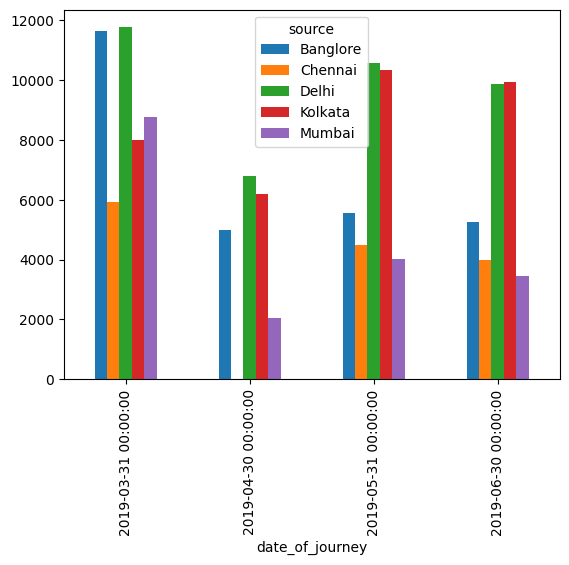

In [526]:
grouped["price"].mean().unstack(fill_value = 0).plot(kind="bar")

In [527]:
from scipy.stats import chi2_contingency

In [528]:
contingency_table = pd.crosstab(train['source'], train['destination'])

# Perform the Chi-square test
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)

# Output results
print("Chi-square statistic:", chi2_stat)
print("P-value:", p_val)
print("Degrees of freedom:", dof)
print("Expected frequencies:")
print(expected)

Chi-square statistic: 2560.0
P-value: 0.0
Degrees of freedom: 20
Expected frequencies:
[[ 34.98125    49.3        12.325       6.34375     4.35        8.7      ]
 [  7.2375     10.2         2.55        1.3125      0.9         1.8      ]
 [ 82.025     115.6        28.9        14.875      10.2        20.4      ]
 [ 58.2015625  82.025      20.50625    10.5546875   7.2375     14.475    ]
 [ 10.5546875  14.875       3.71875     1.9140625   1.3125      2.625    ]]


In [529]:
ehf.num_cat_hyp_testing(train, "price", "source")

- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population mean
- Alternate Hypothesis : The groups don't have similar population mean
- Test Statistic       : 25.683875152981074
- p-value              : 9.494402962912216e-20
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and source are associated to each other


- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population median
- Alternate Hypothesis : The groups don't have similar population median
- Test Statistic       : 127.4406286868075
- p-value              : 1.3729657816537193e-26
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and source are associated to each other


In [530]:
ehf.num_cat_hyp_testing(train, "price", "destination")

- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population mean
- Alternate Hypothesis : The groups don't have similar population mean
- Test Statistic       : 39.36131490064002
- p-value              : 3.0180509607669053e-35
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and destination are associated to each other


- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population median
- Alternate Hypothesis : The groups don't have similar population median
- Test Statistic       : 185.75426215092358
- p-value              : 3.1564317805748713e-38
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and destination are associated to each other


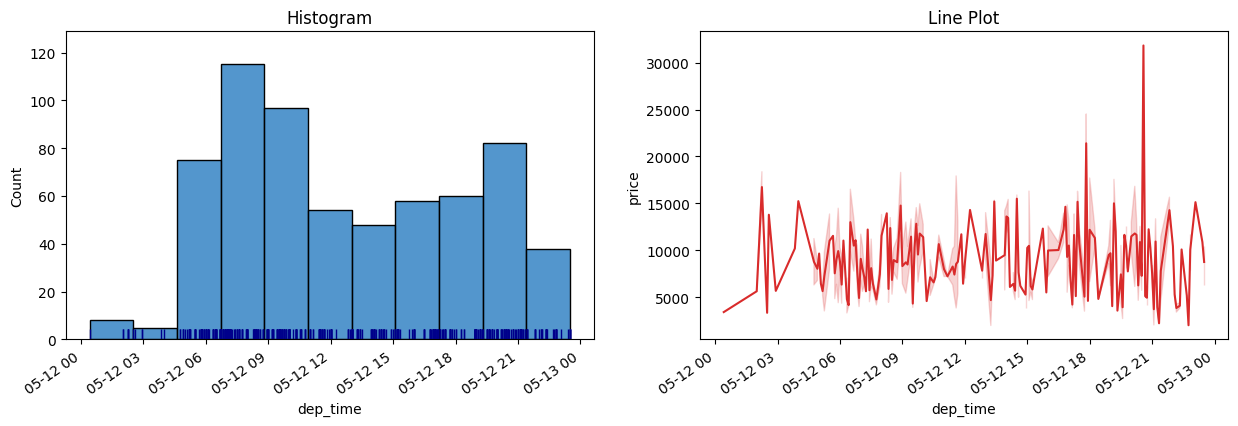

In [531]:
ehf.dt_univar_plots(train, "dep_time","price")

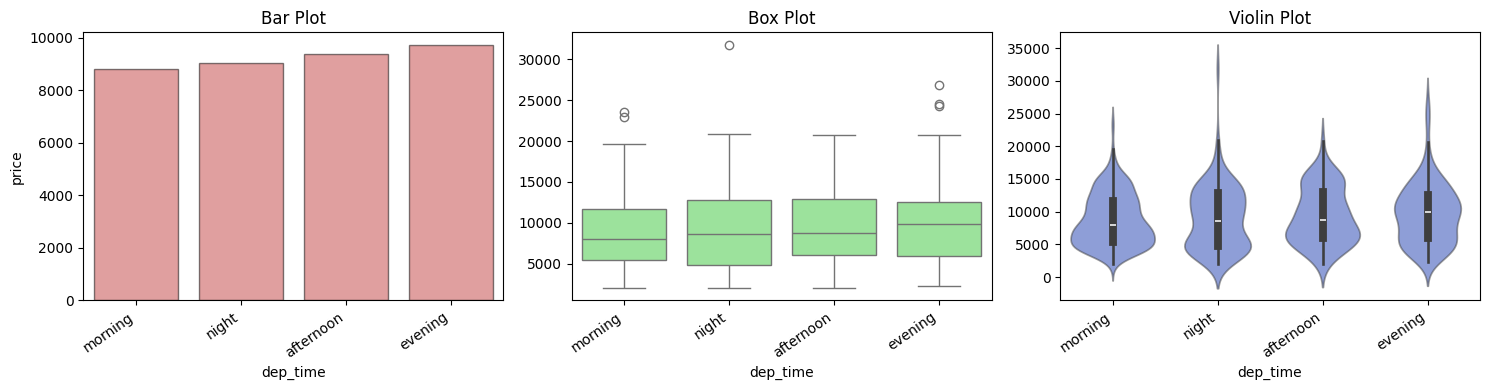

In [532]:
(
    train
    .assign(dep_time = lambda df_: (
        np.select([df_.dep_time.dt.hour.between(4,12,inclusive="left"),
                  df_.dep_time.dt.hour.between(12,16,inclusive="left"),
                  df_.dep_time.dt.hour.between(16,20,inclusive="left")],
                  ["morning","afternoon","evening"],
                  default="night")
    ))
    .pipe(ehf.num_cat_bivar_plots,"price","dep_time")
)

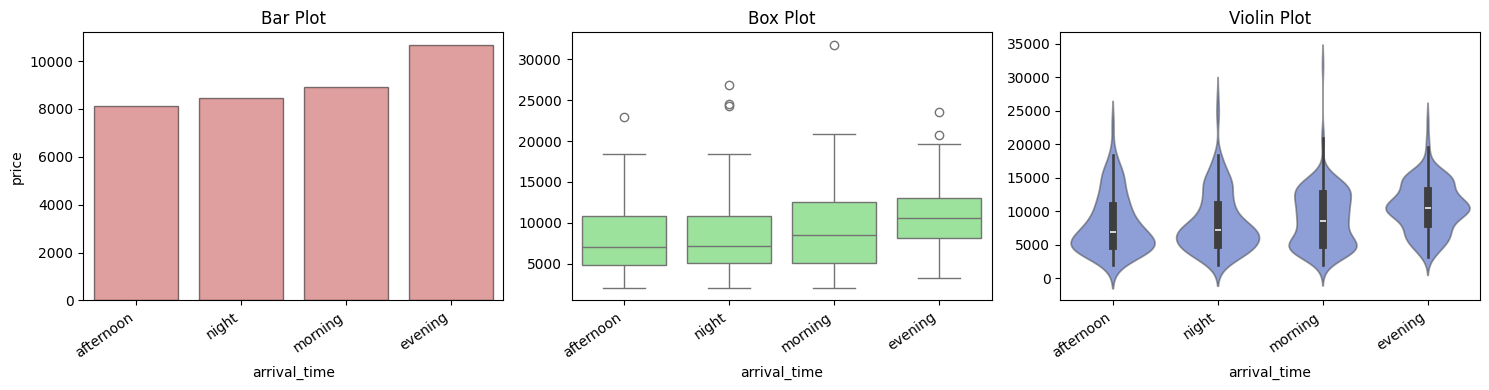

In [533]:
(
    train
    .assign(arrival_time = lambda df_: (
        np.select([df_.arrival_time.dt.hour.between(4,12,inclusive="left"),
                  df_.arrival_time.dt.hour.between(12,16,inclusive="left"),
                  df_.arrival_time.dt.hour.between(16,20,inclusive="left")],
                  ["morning","afternoon","evening"],
                  default="night")
    ))
    .pipe(ehf.num_cat_bivar_plots,"price","arrival_time")
)

Duration

In [534]:
train.duration

0      1195
1      1820
2      2295
3       965
4       920
       ... 
635     330
636    1550
637     390
638     455
639    1215
Name: duration, Length: 640, dtype: int64

In [535]:
ehf.num_summary(train, "duration")

0      1195
1      1820
2      2295
3       965
4       920
       ... 
635     330
636    1550
637     390
638     455
639    1215
Name: duration, Length: 640, dtype: int64

Data Type      : int64
Missing Data   : 0 rows (0.00 %)
Available Data : 640 / 640 rows


,value
percentile,
0,75.00
5,132.75
10,150.00
25,175.00
50,510.00
75,910.00
90,1485.50
95,1625.25
99,1919.15


,value
mean,639.460938
trimmed mean (5%),603.706597
trimmed mean (10%),573.105469
median,510.000000


,value
var,264617.666703
std,514.410018
IQR,735.000000
mad,340.000000
coef_variance,0.804443


,value
skewness,1.015681
kurtosis,0.380231


Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
p-value              : 4.843342415405796e-22
Test Statistic       : 0.8774508833885193
- Since p-value is less than alpha (0.05), we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed


Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
Critical Value       : 0.782
Test Statistic       : 25.540729559554848
- Since the Test-statistic is greater than Critical Value, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed


In [536]:
# ehf.num_univar_plots(train,'duration')

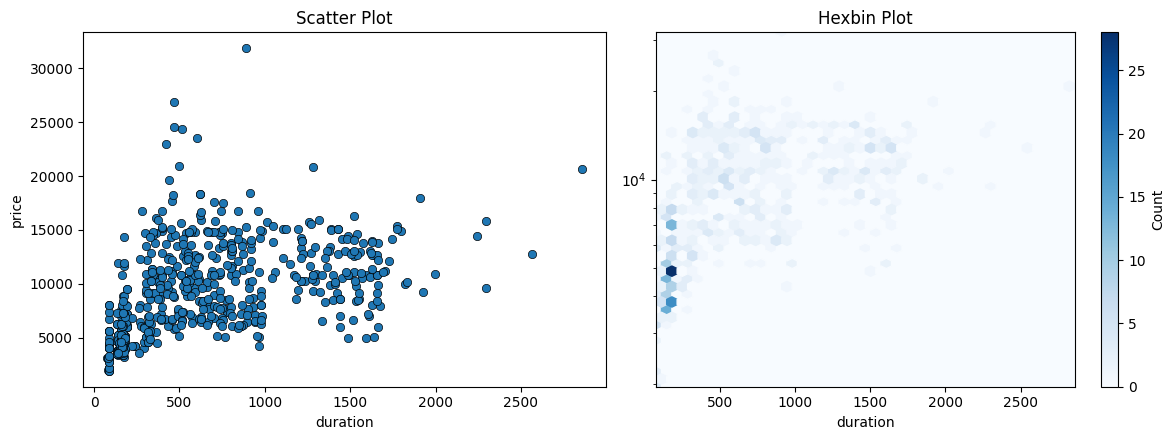

In [537]:
ehf.num_bivar_plots(
    train,
    "duration",
    "price",
    hexbin_kwargs=dict(
        yscale="log",
        gridsize=40,
        cmap="Blues"
    )
)

In [538]:
train["duration"].corr(train["price"])

0.4957323161965091

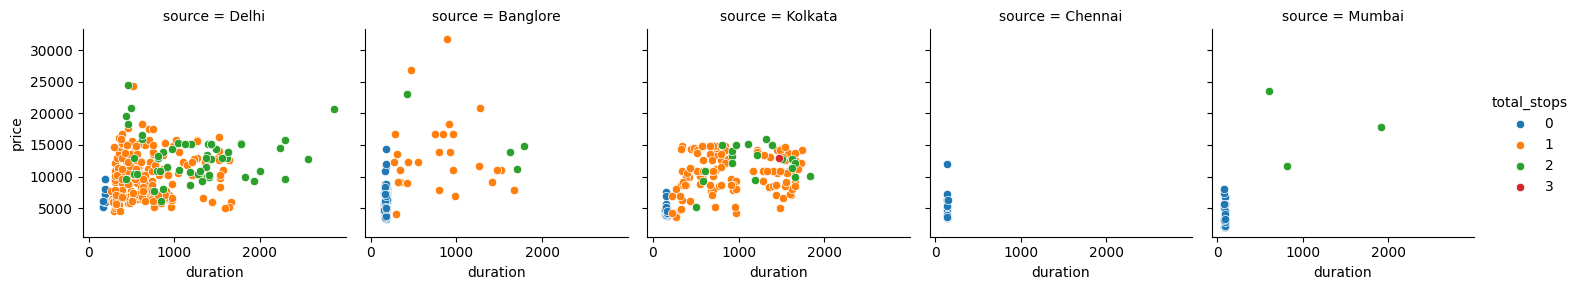

In [539]:
duration_grid = sns.FacetGrid(
    data=train,
    col = "source",
    hue="total_stops",
    sharey=True
)

duration_grid.map(sns.scatterplot, "duration","price")
duration_grid.add_legend()

In [540]:
from ydata_profiling import ProfileReport

In [541]:
report = ProfileReport(train)

In [542]:
ehf.get_iqr_outliers(train, "duration")

Lower Limit : -927.5
Upper Limit : 2012.5


,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price
110,Air India,2019-03-09,Delhi,Cochin,2024-05-12 05:55:00,2024-05-12 19:15:00,2240,2,No Info,14483
2,Jet Airways,2019-03-06,Delhi,Cochin,2024-05-12 05:30:00,2024-05-12 19:45:00,2295,2,In-flight meal not included,15864
402,Air India,2019-05-09,Delhi,Cochin,2024-05-12 05:00:00,2024-05-12 19:15:00,2295,2,No Info,9653
12,Jet Airways,2019-03-21,Delhi,Cochin,2024-05-12 09:40:00,2024-05-12 04:25:00,2565,2,No Info,12819
576,Jet Airways,2019-03-06,Delhi,Cochin,2024-05-12 19:10:00,2024-05-12 18:50:00,2860,2,No Info,20694


In [543]:
ehf.cat_summary(train,"additional_info")

0                          No Info
1                          No Info
2      In-flight meal not included
3      In-flight meal not included
4                          No Info
                  ...             
635                        No Info
636                        No Info
637                        No Info
638                        No Info
639                        No Info
Name: additional_info, Length: 640, dtype: object

Data Type      : object
Cardinality    : 4 categories
Missing Data   : 0 rows (0.00 %)
Available Data : 640 / 640 rows


,
count,640
unique,4
top,No Info
freq,513


,count,percentage
category,,
No Info,513,0.801562
In-flight meal not included,105,0.164062
No check-in baggage included,21,0.032813
Red-eye flight,1,0.001563


Future Engineering

In [544]:
import numpy as np
import pandas as pd
import sklearn
import warnings

In [545]:
pd.set_option("display.max_columns", None)

In [546]:
sklearn.set_config(transform_output="pandas")
warnings.filterwarnings("ignore")

In [547]:
df1 = pd.read_csv("output.csv")

In [599]:
df2 = pd.read_csv("output_val.csv")
df3 = pd.read_csv("output_test.csv")

In [548]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   airline          640 non-null    object 
 1   date_of_journey  640 non-null    object 
 2   source           640 non-null    object 
 3   destination      640 non-null    object 
 4   dep_time         640 non-null    object 
 5   arrival_time     640 non-null    object 
 6   duration         640 non-null    int64  
 7   total_stops      640 non-null    float64
 8   additional_info  640 non-null    object 
 9   price            640 non-null    int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 50.1+ KB


In [549]:
X_train = df1.drop(columns="price")
y_train = df1["price"]

In [600]:
X_val = df2.drop(columns="price")
y_val = df2["price"]

In [625]:
X_test = df3.drop(columns="price")
y_test = df3["price"]

#Transformation Operations

In [550]:
# !pip install feature_engine

In [551]:
X_train.airline

0            Jet Airways
1              Air India
2            Jet Airways
3            Jet Airways
4              Air India
             ...        
635               Indigo
636              Vistara
637    Multiple Carriers
638          Jet Airways
639          Jet Airways
Name: airline, Length: 640, dtype: object

In [552]:
from sklearn.impute import SimpleImputer
from feature_engine.encoding import RareLabelEncoder, MeanEncoder, CountFrequencyEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import (
    OneHotEncoder,MinMaxScaler,PowerTransformer,FunctionTransformer, StandardScaler, OrdinalEncoder
)
from sklearn.pipeline import Pipeline, FeatureUnion
from feature_engine.datetime import DatetimeFeatures

In [553]:
air_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy="most_frequent")),
    ('grouper', RareLabelEncoder(tol=0.1, replace_with="Other", n_categories=2)),
    ("encoder", OneHotEncoder(sparse_output=False, handle_unknown="ignore"))
])

air_transformer.fit_transform(df1.loc[:, ["airline"]])

,airline_Air India,airline_Indigo,airline_Jet Airways,airline_Multiple Carriers,airline_Other
0,0.0,0.0,1.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...
635,0.0,1.0,0.0,0.0,0.0
636,0.0,0.0,0.0,0.0,1.0
637,0.0,0.0,0.0,1.0,0.0
638,0.0,0.0,1.0,0.0,0.0


In [554]:
feature_to_extract = ["month","week","day_of_week","day_of_year"]

doj_transformer = Pipeline(steps=[
    ("dt", DatetimeFeatures(features_to_extract=feature_to_extract, yearfirst=True, format="mixed")),
    ("scaler",MinMaxScaler() )
])
doj_transformer.fit_transform(df1.loc[:,["date_of_journey"]])

,date_of_journey_month,date_of_journey_week,date_of_journey_day_of_week,date_of_journey_day_of_year
0,0.666667,0.705882,0.666667,0.711864
1,0.333333,0.352941,0.166667,0.330508
2,0.000000,0.058824,0.333333,0.042373
3,0.000000,0.176471,0.000000,0.144068
4,0.666667,0.647059,0.833333,0.661017
...,...,...,...,...
635,1.000000,0.882353,0.333333,0.872881
636,1.000000,0.823529,1.000000,0.847458
637,1.000000,0.882353,0.333333,0.872881
638,0.000000,0.235294,0.333333,0.220339


In [555]:
location_subset = X_train.loc[:,["source","destination"]]

In [556]:
location_subset

,source,destination
0,Delhi,Cochin
1,Delhi,Cochin
2,Delhi,Cochin
3,Banglore,New Delhi
4,Kolkata,Banglore
...,...,...
635,Kolkata,Banglore
636,Kolkata,Banglore
637,Delhi,Cochin
638,Delhi,Cochin


In [557]:
location_pipe1 = Pipeline(steps=[
    ("grouper",RareLabelEncoder(tol=0.1, replace_with="Other", n_categories=2)),
    ("encoder",MeanEncoder()),
    ("scaler", PowerTransformer())
])

location_pipe1.fit_transform(location_subset,y_train)

,source,destination
0,1.009376,1.009664
1,1.009376,1.009664
2,1.009376,1.009664
3,-1.109316,-1.073309
4,-0.173130,-0.174942
...,...,...
635,-0.173130,-0.174942
636,-0.173130,-0.174942
637,1.009376,1.009664
638,1.009376,1.009664


Example of Function Transformer

In [558]:
np.union1d(
    X_train["source"].unique(),
    X_train["destination"].unique()
)

array(['Banglore', 'Chennai', 'Cochin', 'Delhi', 'Hyderabad', 'Kolkata',
       'Mumbai', 'New Delhi'], dtype=object)

In [559]:
def is_north(X):
  columns = X.columns.to_list()
  north_cities = ["Delhi","Kolkata","Mumbai","New Delhi"]

  return (
      X
      .assign(**{
          f"{col}_is_north": X.loc[:,col].isin(north_cities).astype(int)
          for col in columns
      })
      .drop(columns=columns)
  )
FunctionTransformer(func=is_north).fit_transform(location_subset)

,source_is_north,destination_is_north
0,1,0
1,1,0
2,1,0
3,0,1
4,1,0
...,...,...
635,1,0
636,1,0
637,1,0
638,1,0


In [560]:
location_transformer = FeatureUnion(transformer_list=[
    ("part1", location_pipe1),
    ("part2", FunctionTransformer(func=is_north))
])

location_transformer.fit_transform(location_subset,y_train)

,source,destination,source_is_north,destination_is_north
0,1.009376,1.009664,1,0
1,1.009376,1.009664,1,0
2,1.009376,1.009664,1,0
3,-1.109316,-1.073309,0,1
4,-0.173130,-0.174942,1,0
...,...,...,...,...
635,-0.173130,-0.174942,1,0
636,-0.173130,-0.174942,1,0
637,1.009376,1.009664,1,0
638,1.009376,1.009664,1,0


In [561]:
time_subset = X_train.loc[:,["arrival_time","dep_time"]]

In [562]:
time_pipe1 = Pipeline(steps=[
    ("dt", DatetimeFeatures(features_to_extract=["hour","minute"])),
    ("scalar", MinMaxScaler())
])

time_pipe1.fit_transform(time_subset)

,arrival_time_hour,arrival_time_minute,dep_time_hour,dep_time_minute
0,0.826087,0.000000,1.000000,0.090909
1,0.826087,0.272727,0.521739,1.000000
2,0.826087,0.818182,0.217391,0.545455
3,0.391304,0.000000,0.695652,1.000000
4,0.043478,0.363636,0.434783,0.000000
...,...,...,...,...
635,0.521739,0.727273,0.304348,0.181818
636,0.782609,0.909091,0.739130,0.000000
637,0.043478,0.545455,0.826087,0.000000
638,0.173913,0.454545,0.869565,0.909091


In [563]:
def part_of_day(X, morning=4, noon=12, eve=16, night=20):
  columns = X.columns.to_list()
  X_temp = X.assign(**{
      col: pd.to_datetime(X.loc[:,col]).dt.hour
      for col in columns
  })
  return (
      X_temp
      .assign(**{
          f"{col}_part_of_day": np.select(
              [X_temp.loc[:,col].between(morning,noon,inclusive="left"),
               X_temp.loc[:, col].between(noon,eve, inclusive="left"),
               X_temp.loc[:,col].between(morning,noon, inclusive="left")],
                ["morning","afternoon","evening"],default="night"
                )
          for col in columns
      })
      .drop(columns=columns)
  )


FunctionTransformer(func=part_of_day).fit_transform(time_subset)


,arrival_time_part_of_day,dep_time_part_of_day
0,night,night
1,night,afternoon
2,night,morning
3,morning,night
4,night,morning
...,...,...
635,afternoon,morning
636,night,night
637,night,night
638,morning,night


In [564]:
time_pipe2 = Pipeline(steps=[
    ("part", FunctionTransformer(func=part_of_day)),
    ("encoder",CountFrequencyEncoder()),
    ('scaler',MinMaxScaler())
])

time_pipe2.fit_transform(time_subset)

,arrival_time_part_of_day,dep_time_part_of_day
0,1.000000,0.651064
1,1.000000,0.000000
2,1.000000,1.000000
3,0.314176,0.651064
4,1.000000,1.000000
...,...,...
635,0.000000,1.000000
636,1.000000,0.651064
637,1.000000,0.651064
638,0.314176,0.651064


In [565]:
time_transformer = FeatureUnion(transformer_list = [
    ("part1", time_pipe1),
    ("part2", time_pipe2)
])

time_transformer.fit_transform(time_subset)

,arrival_time_hour,arrival_time_minute,dep_time_hour,dep_time_minute,arrival_time_part_of_day,dep_time_part_of_day
0,0.826087,0.000000,1.000000,0.090909,1.000000,0.651064
1,0.826087,0.272727,0.521739,1.000000,1.000000,0.000000
2,0.826087,0.818182,0.217391,0.545455,1.000000,1.000000
3,0.391304,0.000000,0.695652,1.000000,0.314176,0.651064
4,0.043478,0.363636,0.434783,0.000000,1.000000,1.000000
...,...,...,...,...,...,...
635,0.521739,0.727273,0.304348,0.181818,0.000000,1.000000
636,0.782609,0.909091,0.739130,0.000000,1.000000,0.651064
637,0.043478,0.545455,0.826087,0.000000,1.000000,0.651064
638,0.173913,0.454545,0.869565,0.909091,0.314176,0.651064


In [566]:
X_train.duration

0      1195
1      1820
2      2295
3       965
4       920
       ... 
635     330
636    1550
637     390
638     455
639    1215
Name: duration, Length: 640, dtype: int64

In [567]:
from sklearn.metrics.pairwise import rbf_kernel
from sklearn.base import BaseEstimator, TransformerMixin

In [568]:
class RBFPercentileSimilarity(BaseEstimator, TransformerMixin):
  def __init__(self, variables=None, percentiles=[0.25,0.5,0.75], gamma=0.2):
    self.variables = variables
    self.percentiles = percentiles
    self.gamma = gamma


  def fit(self, X, y=None):
    if not self.variables:
      self.variables = X.select_dtypes(include="number").columns.to_list()

    self.reference_values_ = {
        col:
         (
            X
            .loc[:,col]
            .quantile(self.percentiles)
            .values
            .reshape(-1,1)
        )
        for col in self.variables
    }

    return self



  def transform(self, X):
    objects=[]
    for col in self.variables:
      columns=[f"{col}_rbf_{int(percentile * 100)}" for percentile in self.percentiles]
      obj = pd.DataFrame(
          data=rbf_kernel(X.loc[:,[col]], Y=self.reference_values_[col], gamma = self.gamma),
          columns = columns
      )
      objects.append(obj)

    return pd.concat(objects, axis=1)


In [569]:
RBFPercentileSimilarity().fit_transform(X_train.loc[:,["duration"]])

,duration_rbf_25,duration_rbf_50,duration_rbf_75
0,0.0,0.000000e+00,0.000000e+00
1,0.0,0.000000e+00,0.000000e+00
2,0.0,0.000000e+00,0.000000e+00
3,0.0,0.000000e+00,1.785823e-263
4,0.0,0.000000e+00,2.061154e-09
...,...,...,...
635,0.0,0.000000e+00,0.000000e+00
636,0.0,0.000000e+00,0.000000e+00
637,0.0,0.000000e+00,0.000000e+00
638,0.0,1.785823e-263,0.000000e+00


In [570]:
from feature_engine.outliers import Winsorizer

In [571]:
def duration_category(X, short=180, med=400):
  return (
      X
      .assign(duration_cat = np.select([X.duration.lt(short),
                                        X.duration.between(short, med,inclusive="left")],
                                       ["short","medium"],
                                       default="long"))

      .drop(columns="duration")
  )

In [572]:
def is_over(X, value=1000):
  return (
      X
      .assign(**{
          f"duration_over_{value}":X.duration.ge(value).astype(int)
      })
      .drop(columns="duration")
  )

In [573]:
duration_pipe = Pipeline(steps=[
    ("rbf", RBFPercentileSimilarity()),
    ("scaler", PowerTransformer())
])
duration_pipe1 = Pipeline(steps=[
    ("cat",FunctionTransformer(func=duration_category)),
    ("encoder",OrdinalEncoder(categories=[["short","medium","long"]]))
])
duration_union = FeatureUnion(transformer_list=[
    ("part1", duration_pipe),
    ("part2", duration_pipe1),
    ("part3", FunctionTransformer(func=is_over)),
    ("part4", StandardScaler())
])

duration_transformer = Pipeline(steps=[
    ("outliers",Winsorizer(capping_method="iqr", fold=1.5)),
    ("imputer", SimpleImputer(strategy="median")),
    ("union", duration_union)
])

In [574]:
duration_transformer.fit_transform(X_train.loc[:,["duration"]])

,duration_rbf_25,duration_rbf_50,duration_rbf_75,duration_cat,duration_over_1000,duration
0,-0.272063,-0.111041,-0.088313,2.0,1,1.111599
1,-0.272063,-0.111041,-0.088313,2.0,1,2.354521
2,-0.272063,-0.111041,-0.088313,2.0,1,2.737341
3,-0.272063,-0.111041,-0.088313,2.0,0,0.654204
4,-0.272063,-0.111041,-0.088308,2.0,0,0.564714
...,...,...,...,...,...,...
635,-0.272063,-0.111041,-0.088313,1.0,0,-0.608604
636,-0.272063,-0.111041,-0.088313,2.0,1,1.817579
637,-0.272063,-0.111041,-0.088313,1.0,0,-0.489284
638,-0.272063,-0.111041,-0.088313,2.0,0,-0.360020


In [575]:
def is_direct(X):
  return X.assign(is_direct_flight = X.total_stops.eq(0).astype(int))

total_stops_transformer = Pipeline(steps=[
    ("imputer",SimpleImputer(strategy="most_frequent")),
    ("",FunctionTransformer(func=is_direct))
])

total_stops_transformer.fit_transform(X_train.loc[:,["total_stops"]])

,total_stops,is_direct_flight
0,2.0,0
1,2.0,0
2,2.0,0
3,1.0,0
4,2.0,0
...,...,...
635,1.0,0
636,1.0,0
637,1.0,0
638,1.0,0


In [576]:
info_pipe1 = Pipeline(steps=[
    ("group", RareLabelEncoder(tol=0.1, n_categories=2, replace_with="Other")),
    ("encoder", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
])

info_pipe1.fit_transform(X_train.loc[:, ["additional_info"]])

,additional_info_In-flight meal not included,additional_info_No Info,additional_info_Other
0,0.0,1.0,0.0
1,0.0,1.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,0.0,1.0,0.0
...,...,...,...
635,0.0,1.0,0.0
636,0.0,1.0,0.0
637,0.0,1.0,0.0
638,0.0,1.0,0.0


In [577]:
def have_info(X):
  return X.assign(additional_info= X.additional_info.ne("No Info").astype(int))

info_union = FeatureUnion(transformer_list = [
    ("part1", info_pipe1),
    ("part2", FunctionTransformer(func=have_info))
])
info_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value="unknown")),
    ("union", info_union)
])

info_transformer.fit_transform(X_train.loc[:,["additional_info"]])

,additional_info_In-flight meal not included,additional_info_No Info,additional_info_Other,additional_info
0,0.0,1.0,0.0,0
1,0.0,1.0,0.0,0
2,1.0,0.0,0.0,1
3,1.0,0.0,0.0,1
4,0.0,1.0,0.0,0
...,...,...,...,...
635,0.0,1.0,0.0,0
636,0.0,1.0,0.0,0
637,0.0,1.0,0.0,0
638,0.0,1.0,0.0,0


#Column Transformer

In [578]:
column_transformer = ColumnTransformer(transformers=[
    ("air", air_transformer,["airline"]),
    ("doj", doj_transformer, ["date_of_journey"]),
    ("location",location_transformer, ["source","destination"]),
    ("time", time_transformer, ["arrival_time","dep_time"]),
    ("duration", duration_transformer,["duration"]),
    ("stops", total_stops_transformer, ["total_stops"]),
    ("info", info_transformer, ["additional_info"])
],remainder="passthrough")

column_transformer.fit_transform(X_train,y_train)

,air__airline_Air India,air__airline_Indigo,air__airline_Jet Airways,air__airline_Multiple Carriers,air__airline_Other,doj__date_of_journey_month,doj__date_of_journey_week,doj__date_of_journey_day_of_week,doj__date_of_journey_day_of_year,location__source,location__destination,location__source_is_north,location__destination_is_north,time__arrival_time_hour,time__arrival_time_minute,time__dep_time_hour,time__dep_time_minute,time__arrival_time_part_of_day,time__dep_time_part_of_day,duration__duration_rbf_25,duration__duration_rbf_50,duration__duration_rbf_75,duration__duration_cat,duration__duration_over_1000,duration__duration,stops__total_stops,stops__is_direct_flight,info__additional_info_In-flight meal not included,info__additional_info_No Info,info__additional_info_Other,info__additional_info
0,0.0,0.0,1.0,0.0,0.0,0.666667,0.705882,0.666667,0.711864,1.009376,1.009664,1,0,0.826087,0.000000,1.000000,0.090909,1.000000,0.651064,-0.272063,-0.111041,-0.088313,2.0,1,1.111599,2.0,0,0.0,1.0,0.0,0
1,1.0,0.0,0.0,0.0,0.0,0.333333,0.352941,0.166667,0.330508,1.009376,1.009664,1,0,0.826087,0.272727,0.521739,1.000000,1.000000,0.000000,-0.272063,-0.111041,-0.088313,2.0,1,2.354521,2.0,0,0.0,1.0,0.0,0
2,0.0,0.0,1.0,0.0,0.0,0.000000,0.058824,0.333333,0.042373,1.009376,1.009664,1,0,0.826087,0.818182,0.217391,0.545455,1.000000,1.000000,-0.272063,-0.111041,-0.088313,2.0,1,2.737341,2.0,0,1.0,0.0,0.0,1
3,0.0,0.0,1.0,0.0,0.0,0.000000,0.176471,0.000000,0.144068,-1.109316,-1.073309,0,1,0.391304,0.000000,0.695652,1.000000,0.314176,0.651064,-0.272063,-0.111041,-0.088313,2.0,0,0.654204,1.0,0,1.0,0.0,0.0,1
4,1.0,0.0,0.0,0.0,0.0,0.666667,0.647059,0.833333,0.661017,-0.173130,-0.174942,1,0,0.043478,0.363636,0.434783,0.000000,1.000000,1.000000,-0.272063,-0.111041,-0.088308,2.0,0,0.564714,2.0,0,0.0,1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,0.0,1.0,0.0,0.0,0.0,1.000000,0.882353,0.333333,0.872881,-0.173130,-0.174942,1,0,0.521739,0.727273,0.304348,0.181818,0.000000,1.000000,-0.272063,-0.111041,-0.088313,1.0,0,-0.608604,1.0,0,0.0,1.0,0.0,0
636,0.0,0.0,0.0,0.0,1.0,1.000000,0.823529,1.000000,0.847458,-0.173130,-0.174942,1,0,0.782609,0.909091,0.739130,0.000000,1.000000,0.651064,-0.272063,-0.111041,-0.088313,2.0,1,1.817579,1.0,0,0.0,1.0,0.0,0
637,0.0,0.0,0.0,1.0,0.0,1.000000,0.882353,0.333333,0.872881,1.009376,1.009664,1,0,0.043478,0.545455,0.826087,0.000000,1.000000,0.651064,-0.272063,-0.111041,-0.088313,1.0,0,-0.489284,1.0,0,0.0,1.0,0.0,0
638,0.0,0.0,1.0,0.0,0.0,0.000000,0.235294,0.333333,0.220339,1.009376,1.009664,1,0,0.173913,0.454545,0.869565,0.909091,0.314176,0.651064,-0.272063,-0.111041,-0.088313,2.0,0,-0.360020,1.0,0,0.0,1.0,0.0,0


# Feature Selection

In [579]:
from sklearn.ensemble import RandomForestRegressor
from feature_engine.selection import SelectBySingleFeaturePerformance

In [580]:
estimator = RandomForestRegressor(n_estimators=10, max_depth=3,random_state=42)

selector = SelectBySingleFeaturePerformance(
    estimator=estimator,
    scoring="r2",
    threshold=0.1,
)

In [581]:
preprocessor = Pipeline(steps=[
    ("ct", column_transformer),
    ("selector",selector)
])

In [637]:
preprocessor_test_val = Pipeline(steps=[
    ("ct", column_transformer),
])

In [582]:
preprocessor.fit_transform(X_train, y_train)

,air__airline_Indigo,air__airline_Jet Airways,air__airline_Other,doj__date_of_journey_week,doj__date_of_journey_day_of_year,location__source,location__destination,duration__duration_cat,duration__duration,stops__total_stops,stops__is_direct_flight
0,0.0,1.0,0.0,0.705882,0.711864,1.009376,1.009664,2.0,1.111599,2.0,0
1,0.0,0.0,0.0,0.352941,0.330508,1.009376,1.009664,2.0,2.354521,2.0,0
2,0.0,1.0,0.0,0.058824,0.042373,1.009376,1.009664,2.0,2.737341,2.0,0
3,0.0,1.0,0.0,0.176471,0.144068,-1.109316,-1.073309,2.0,0.654204,1.0,0
4,0.0,0.0,0.0,0.647059,0.661017,-0.173130,-0.174942,2.0,0.564714,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...
635,1.0,0.0,0.0,0.882353,0.872881,-0.173130,-0.174942,1.0,-0.608604,1.0,0
636,0.0,0.0,1.0,0.823529,0.847458,-0.173130,-0.174942,2.0,1.817579,1.0,0
637,0.0,0.0,0.0,0.882353,0.872881,1.009376,1.009664,1.0,-0.489284,1.0,0
638,0.0,1.0,0.0,0.235294,0.220339,1.009376,1.009664,2.0,-0.360020,1.0,0


In [583]:
features = preprocessor.named_steps["selector"].feature_performance_

In [584]:
sorted_feature= sorted(features.items(), key=lambda x: x[1])

In [585]:
sorted_feature[0][1]

-0.027669391934821652

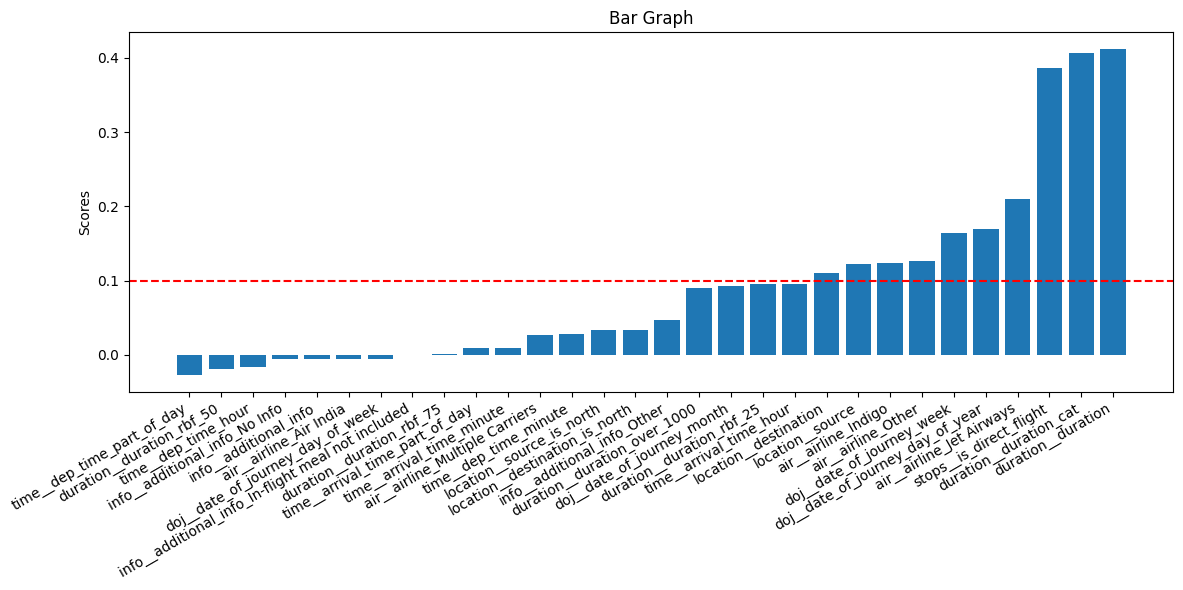

In [586]:
import matplotlib.pyplot as plt
import numpy as np


column_names = [sorted_feature[i][0] for i in range(0, 30)]
scores = [sorted_feature[i][1] for i in range(0,30)]

fig, ax = plt.subplots(figsize=(12, 6))

ax.bar(column_names, scores)
ax.axhline(y=0.1,linestyle='--', color='red', label='Threshold')
plt.xticks(rotation=30, ha='right')

ax.set_ylabel('Scores')
ax.set_title('Bar Graph')

plt.tight_layout()
plt.show()


In [587]:
import os
import pickle

In [588]:
X_test

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info
6995,Jet Airways,2019-05-27,Delhi,Cochin,19:30:00,12:35:00,1025,2.0,In-flight meal not included
2164,Air India,2019-04-01,Kolkata,Banglore,12:00:00,11:10:00,1390,2.0,No Info
1089,Indigo,2019-03-21,Mumbai,Hyderabad,16:55:00,18:25:00,90,0.0,No Info
3654,Indigo,2019-06-24,Mumbai,Hyderabad,09:10:00,10:40:00,90,0.0,No Info
958,Air India,2019-05-18,Kolkata,Banglore,08:20:00,07:55:00,1415,2.0,No Info
...,...,...,...,...,...,...,...,...,...
4720,Indigo,2019-03-27,Delhi,Cochin,04:45:00,13:20:00,515,1.0,No Info
10130,Jet Airways,2019-06-06,Kolkata,Banglore,21:10:00,08:15:00,665,1.0,In-flight meal not included
5243,Indigo,2019-03-03,Banglore,New Delhi,01:30:00,04:15:00,165,0.0,No Info
914,Air Asia,2019-06-06,Kolkata,Banglore,10:20:00,12:55:00,155,0.0,No Info


In [589]:
X_val["date_of_journey"] = X_val["date_of_journey"].astype(object)
X_test["date_of_journey"] = X_test["date_of_journey"].astype(object)

In [590]:
X_train.info()
X_val.info()
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   airline          640 non-null    object 
 1   date_of_journey  640 non-null    object 
 2   source           640 non-null    object 
 3   destination      640 non-null    object 
 4   dep_time         640 non-null    object 
 5   arrival_time     640 non-null    object 
 6   duration         640 non-null    int64  
 7   total_stops      640 non-null    float64
 8   additional_info  640 non-null    object 
dtypes: float64(1), int64(1), object(7)
memory usage: 45.1+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 160 entries, 1851 to 3496
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   airline          160 non-null    object 
 1   date_of_journey  160 non-null    object 
 2   source           160 non-null    ob

#RandomForest Algorithms

In [591]:
from sklearn.metrics import mean_squared_error

In [592]:
x_train_1 = preprocessor.fit_transform(X_train,y_train)

In [618]:
X_test['date_of_journey'] = pd.to_datetime(X_test['date_of_journey'])
X_test['date_of_journey'] = X_test['date_of_journey'].dt.date

In [622]:
X_val['date_of_journey'] = pd.to_datetime(X_val['date_of_journey'])
X_val['date_of_journey'] = X_val['date_of_journey'].dt.date

In [620]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   airline          200 non-null    object 
 1   date_of_journey  200 non-null    object 
 2   source           200 non-null    object 
 3   destination      200 non-null    object 
 4   dep_time         200 non-null    object 
 5   arrival_time     200 non-null    object 
 6   duration         200 non-null    int64  
 7   total_stops      200 non-null    float64
 8   additional_info  200 non-null    object 
dtypes: float64(1), int64(1), object(7)
memory usage: 14.2+ KB


In [647]:
x_test_1 = preprocessor_test_val.fit_transform(X_test,y_test)

In [644]:
x_test_1.dtypes

air__airline_Air India                               float64
air__airline_Indigo                                  float64
air__airline_Jet Airways                             float64
air__airline_Multiple Carriers                       float64
air__airline_Other                                   float64
doj__date_of_journey_month                           float64
doj__date_of_journey_week                            float64
doj__date_of_journey_day_of_week                     float64
doj__date_of_journey_day_of_year                     float64
location__source                                     float64
location__destination                                float64
location__source_is_north                              int64
location__destination_is_north                         int64
time__arrival_time_hour                              float64
time__arrival_time_minute                            float64
time__dep_time_hour                                  float64
time__dep_time_minute   

In [652]:
fixed_columns = x_train_1.columns.tolist()
fixed_columns
# x_test_1 = x_test_1[fixed_columns]

['air__airline_Indigo',
 'air__airline_Jet Airways',
 'air__airline_Other',
 'doj__date_of_journey_week',
 'doj__date_of_journey_day_of_year',
 'location__source',
 'location__destination',
 'duration__duration_cat',
 'duration__duration',
 'stops__total_stops',
 'stops__is_direct_flight']

In [653]:
x_test_1 = x_test_1[fixed_columns]

In [654]:
y_test_1

0      13029
1       9258
2       3175
3       4049
4      10697
       ...  
195     7048
196    10844
197     6860
198     4508
199     7295
Name: price, Length: 200, dtype: int64

In [655]:
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(x_train_1, y_train_1)

RandomForestRegressor(random_state=42)

In [656]:
# Predict on the test set
y_pred = rf_regressor.predict(x_test_1)

# Evaluate the model
mse = mean_squared_error(y_test_1, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 5377506.42614115


In [657]:
import xgboost as xgb

dtrain = xgb.DMatrix(x_train_1, label=y_train_1)
dtest = xgb.DMatrix(x_test_1, label=y_test_1)

params = {'objective': 'reg:squarederror', 'eval_metric': 'rmse'}

num_rounds = 100
xgb_regressor = xgb.train(params, dtrain, num_rounds)

y_pred = xgb_regressor.predict(dtest)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 6593505.210148232


In [659]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error
import pandas as pd


# Define RandomForestRegressor
rf_regressor = RandomForestRegressor()

# Define hyperparameters to search
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],   # Maximum depth of the tree
    'min_samples_split': [None,2, 5],   # Minimum number of samples required to split a node
    'min_samples_leaf': [None, 1, 2]      # Minimum number of samples required at each leaf node
}

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=rf_regressor, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(x_train_1, y_train_1)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Evaluate the best model on test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test_1)
mse = mean_squared_error(y_test_1, y_pred)
print("Mean Squared Error:", mse)


Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Mean Squared Error: 5722464.048161588
